# Model-fitting with homogeneous least squares
**ES143 Computer Vision, Harvard University, Fall 2020**

In this assignment you will apply the concepts you learned from reading about singular value decomposition and least-squares model fitting. There are three questions. Questions 1 and 3 require coding, and Question 2 requires a combination of coding and short mathematical derivations. You may submit the mathematical derivations in this notebook by typesetting in markdown, or you may submit it in a separate PDF that you create by handwriting on your tablet (or camera-scanning a paper). If you choose to submit a separate PDF, indicate that you are doing so in this notebook.

This notebook requires two test images fro the course website: `RoadLanes.png` and `MaxwellDworkin_01.jpg`.

Submit `.ipynb` and `.html` versions of this notebook to [canvas](https://canvas.harvard.edu/courses/78234/assignments/411087). Filenames should be of the form `svd_lastname_firstname.ipynb` and `svd_lastname_firstname.html`.

In [1]:
# Import any required libraries here
import cv2                # OpenCV
import numpy as np        # numpy
import scipy.interpolate  # interpolation

# Use this line to make plots static and non-interactive
# (only need to call it once when importing matplotlib)
%matplotlib inline

import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


## Question 1

Calculate and plot a line that best fits the locations of the thresholded pixels in image <tt>RoadLanes.png</tt> using the _total least squares_ approach described in Section A.2.1 (pages 744-746) of Szeliski. Be sure to include the normalization step (subtraction of mean values, Equations (A.42) and (A.43)). 

This approach is preferred over the approach from Module 4 because it minimizes the sum of perpendicular errors as opposed to the sum of vertical errors.

The next cell loads and display the image. Your work for this question should appear in the cell after that.

(-0.5, 637.5, 222.5, -0.5)

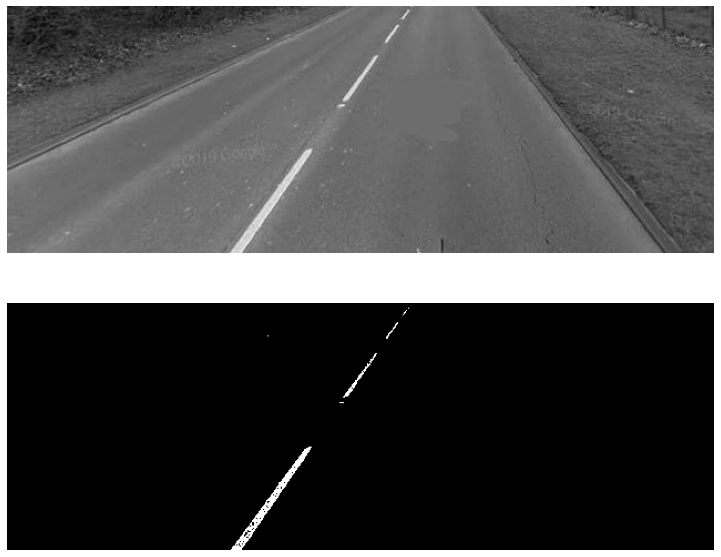

In [2]:
# read image and convert to grayscale
im=cv2.cvtColor(cv2.imread('RoadLanes.png'), cv2.COLOR_BGR2GRAY)

# detect center-line points by thresholding (value of 190 works well)
THRESHOLD = 190
imthresh = im > THRESHOLD

# display thresholded image
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.imshow(im,cmap="gray")
plt.axis('off')
plt.subplot(212)
plt.imshow(imthresh,cmap="gray")
plt.axis('off')

### Work here
Edit the cell below, where it says `# WRITE YOUR CODE HERE`.

We've provided a helper function to draw a line from any homogeneous vector ${\bf l}=(a,b,c)$. We've also used the function `np.nonzero()` to harvest the coordinates `x,y` (each an $N\times 1$ array) for the detected pixels. 

Initially, the cell will plot a "dumb" horizontal line ${\bf l}=(0,-1,100)$. Try running it. 

Your task is to write code that replaces this with the line ${\bf l}$ that best fits the detected points using total least squares. For singular value decomposition, use `numpy.linalg.svd()`.

In [3]:
# helper: plot line in given axes
def plotimageline(ax,dsize,l,col):
    #  ax: axes object
    #  dsize: [h w] height and width of image
    #  l: line as homogeneous three-vector
    #  col: color string to be passed to ax.plot(), e.g. 'r'
    
    assert l.size==3,'unexpected line shape'
    assert l[1]!=0,'exactly-vertical lines are not supported'

    # intersections of line with image boundary
    x_ext = np.array([0, dsize[1] - 1])
    y_ext = -(l[0] * x_ext + l[2]) / l[1]
    
    # draw
    ax.plot(x_ext, y_ext,col)

    return 1

# pixel coordinates of detected points
y, x = np.nonzero(imthresh)

l = np.array([0,-1,100])

In [4]:
print(type(y))
print(np.mean(y))

np.stack([x,y]).shape

<class 'numpy.ndarray'>
157.20468557336622


(2, 811)

In [5]:
# WRITE YOUR CODE HERE

x_bar = np.mean(x)
y_bar = np.mean(y)

y_hat = y- y_bar
x_hat = x- x_bar

A = [[x_i, y_i] for x_i, y_i in zip(x_hat, y_hat)]

# Now we perform singular value decomposition on A
U, D, VT = np.linalg.svd(A)

V = VT.T

print("V:", V)
argmin_x = V[:,-1]
print(argmin_x)




ans_a, ans_b = argmin_x[0], argmin_x[1] 

# we know that a(x - xbar) + b(y - ybar) = 0,
# Also know ax + by + c = 0
# so, c = -a*xbar -b*ybar

c = -ans_a * x_bar - ans_b*y_bar

l= np.array([ans_a, ans_b, c])
print(l)



V: [[-0.58018519  0.81448459]
 [ 0.81448459  0.58018519]]
[0.81448459 0.58018519]
[   0.81448459    0.58018519 -297.08563225]


1

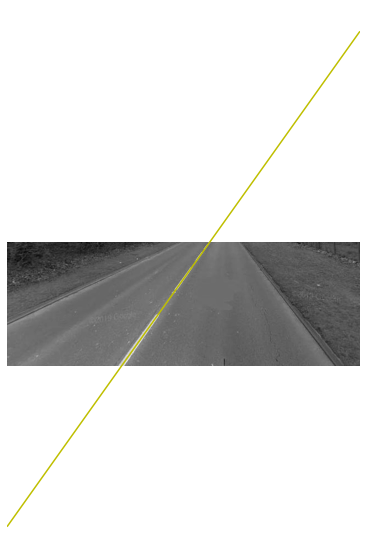

In [6]:
# plot the line
fig, ax = plt.subplots(figsize=(12,10))
ax.imshow(im,cmap="gray")
ax.axis('off')
plotimageline(ax,im.shape,l,'y')

## Question 2


In Question 1, normalizing the input data points by subtracting the mean $x$ and $y$ values (Szeliski Equations (A.42) and (A.43)) is critical to ensuring that the error being algebraically minimized makes geometric sense. This is a common feature of many model-fitting problems using homogeneous least-squares.

In future assignments you will need to make use of a different sort of normalization of a point-set, namely one that uses a special class of similarity transformations that involve no rotation. This type of linear transformation can be written

\begin{equation}
\left(\begin{array}{c} x' \\ y' \\ 1\end{array}\right)=
\left[\begin{array}{ccc} s & 0 & t_x \\ 0 & s & t_y \\ 0 & 0 & 1\end{array}\right]
\left(\begin{array}{c} x \\ y \\ 1\end{array}\right),
\end{equation}

where, since it operates on homogeneous vectors, '$=$' indicates equality up to scale. In matrix notation, this is 
written ${\bf x}'={\bf T}{\bf x}$. 

---
**a.** Suppose you are given a set of $N$ inhomogeneous points $\tilde{\bf x}_i=(x_i,\ y_i)$, $i=1\ldots N$. Write expressions for $s$, $t_x$ and $t_y$ in terms of $\{(x_i,\ y_i)\}$ that, when used in the equation above, produce a transformed set of points $\{\tilde{\bf x}_i\}$ with the following properties:
- The centroid of the points $\{\tilde{\bf x}'_i\}$ is the origin, $(0,\ 0)$.
- The average distance from the origin to points $\{\tilde{\bf x}'_i\}$ is $\sqrt{2}$.

You may write your expressions in this cell using latex/markdown, or you may submit them separately in a PDF.

_your text here_


$$s= \frac{1}{\sqrt{\frac{1}{2N}\sum_{i=1}^{N}{(x_i-x_m)^2 + (y_i-y_m)^2 }}}$$

$$t_x = -sx_m$$,
$$t_y = -sy_m$$,

where 
$$x_m = \frac{1}{N}\sum_{i=1}^{N}{x_i}$$
$$y_m = \frac{1}{N}\sum_{i=1}^{N}{y_i}$$

---
**b.** In the following cell, write a function <tt>getT(X1)</tt> that takes an $N\times 2$
arrays of inhomogeneous points (where each row is $(x_i,y_i)$) and returns the $3\times 3$ similarity matrix $\bf T$ defined above.

*Hint: Make sure the returned matrix is of the correct <tt>dtype</tt> (for example <tt>np.float32</tt>). Additionally, pay close attention to the differences between <tt>numpy.matrix</tt> and <tt>numpy.array</tt> (both of which may be used, yet have different properties).*

In [7]:
def getT(X1):

    # WRITE YOUR CODE HERE, REPLACING THE FOLLOWING LINE
    
    print("input X1:", X1)
    
    N = X1.shape[0]
    
    xm = np.mean(X1[:,0])
    ym = np.mean(X1[:,1])
    
    xi_xm_sqrd = (X1[:,0] - xm)**2
    yi_ym_sqrd = (X1[:,1] - ym)**2
    
#     print(xi_xm_sqrd)
#     print(yi_ym_sqrd)
    
    denom = np.sqrt(np.mean(xi_xm_sqrd+yi_ym_sqrd) / 2.0)
    
    
    s = 1.0 / denom
    tx = -s*xm
    ty = -s*ym
    
    
    T = np.array([[s,0,tx],
                  [0,s,ty],
                  [0,0,1]])
    
    return T

---
**c.** Test your function using the following cell. In addition, write a brief description of the operations being performed in lines three and four.

input X1: [[15.08836898 33.82369705]
 [ 4.99698019 97.08987254]
 [76.66275907 67.14172539]
 [44.79844234 61.24786551]
 [19.21790926 24.82750433]
 [64.35085841 20.44065799]
 [ 8.28276397 42.33693454]
 [21.06711234 52.14640915]
 [53.47472689 15.67394071]
 [52.46319912  9.83549286]
 [12.81347105 72.11320524]
 [65.18438458 17.15658052]
 [42.39838549 82.60006966]
 [89.66788836 62.73182157]
 [71.84805638 57.91424633]
 [18.44773727  2.96058137]
 [ 2.70832271 25.70553403]
 [79.97343438 47.59310075]
 [15.86222008  6.02214185]
 [19.5447261  82.30504752]
 [ 0.4977643  65.51431852]
 [48.62386148 65.87120608]
 [50.66237715 67.23884703]
 [10.78640333 14.12738189]
 [70.9780527  97.90034496]
 [86.1352266  86.59458414]
 [42.85168725 82.70817481]
 [ 5.91623701 43.63655697]
 [68.50202058 28.00166742]
 [61.94040536 13.25813721]
 [61.50505421 22.56732464]
 [43.35774931 39.48932992]
 [ 1.96927485  6.78497104]
 [57.81312009 94.45501233]
 [67.41872196  1.11796712]
 [83.46563499 86.67977113]
 [ 0.17597165 28.0

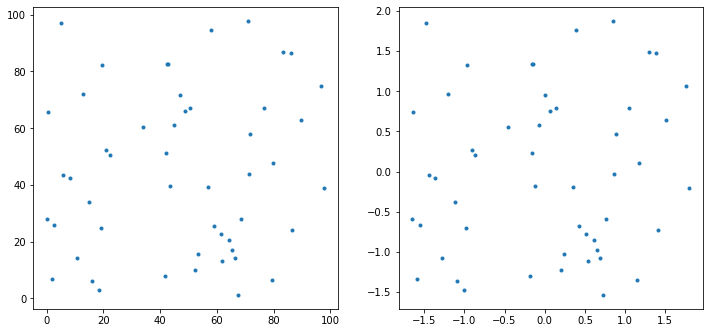

In [8]:
X = np.random.rand(50, 2) * 100  # 50 random points in square [0,100]x[0,100]
T = getT(X)

# TO DO: explain the next two lines
Xn = T.dot(np.concatenate([X.transpose(), np.ones((1, 50), dtype=np.float32)], axis=0)).transpose()
Xni = Xn[:, :2] / Xn[:, 2:]  # Note the difference between Xn[:, 2:] and Xn[:, 2]!

fig = plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1, aspect='equal')
plt.plot(X[:, 0], X[:, 1], '.')
plt.subplot(1, 2, 2, aspect='equal')
plt.plot(Xni[:, 0], Xni[:, 1], '.');

#### Describe the operations being performed in lines three and four:
_your text here_

3rd line: Xn is the result of 1) turning the inhomogeneous coordinates of X into homogeneous coordinates, and 2) normalizing the homogeneous coordinates.

4rd line: Xni is changing the homogeneous coordinates back to the inhomegeneous coordinates.

## Question 3

A homography relating two images can be estimated from four or more pairs of corresponding points. When these four points correspond to known metric points on a plane, such a homography can be used to remove projective distortion via metric rectification.

---
**a**. Write a function `getH(X1, X2)` that takes two $N\times 2$ arrays of image coordinates (where each row is $(x_i,y_i)$ and returns the $3\times 3$ homography matrix that maps points in the first image (`X1`) to corresponding points in the second (`X2`). Use your function `getT()` from Question 2 to implement normalization as discussed in Section 4.4.4 (and Algorithm 4.2) of Hartley & Zisserman.

In [46]:
def getAi(X1, X2):
    
    print("X2:", X2)
    print("X1:", X1)
    print("after hstack:")
    X1 = np.hstack([X1, np.ones(1)])
    print(X1)
    x2 = X2[0]
    y2 = X2[1]
#     w2 = X2[2]
    w2 = 1
    
    w2dotX1 = np.dot(w2,X1)
    y2dotX1 = np.dot(y2,X1)
    x2dotX1 = np.dot(x2,X1)
    
    Ai = np.array([
        [0,0,0, -1*w2dotX1[0],-1*w2dotX1[1], -1*w2dotX1[2], y2dotX1[0],y2dotX1[1],y2dotX1[2]],
        [w2dotX1[0],w2dotX1[1], w2dotX1[2], 0,0,0, -x2dotX1[0],-x2dotX1[1],-x2dotX1[2]]  
    ])
    
    
    
    return Ai

def getH(X1, X2):
    
    # WRITE YOUR CODE HERE, REPLACING THE FOLLOWING LINE
    # Obtain Normalizing Transformation  of both point sets, independently
    T1 = getT(X1)
    T2 = getT(X2)
    
#     X1_first_four = X1[:4]
#     X2_first_four = X2[:4]
    
    # Application of the Normalization
    X1 = T1.dot(np.concatenate([X1.transpose(), np.ones((1, len(X1)), dtype=np.float32)], axis=0)).transpose()
#     X1 = X1[:, :2] / X1[:, 2:]  # Note the difference between Xn[:, 2:] and Xn[:, 2]!
    
    print("X2: ", X2)
    X2 = T2.dot(np.concatenate([X2.transpose(), np.ones((1, len(X2)), dtype=np.float32)], axis=0)).transpose()
    print("X2 after Normalization")
#     X2 = X2[:, :2] / X2[:, 2:]  # Note the difference between Xn[:, 2:] and Xn[:, 2]!
    
    
    Ais = []
    for i in range(4):
        X1_ith = X1[i]
        X2_ith = X2[i]
        Ais.append(getAi(X1_ith,X2_ith))
        
    A = np.vstack(Ais)
    
    
    print("A: ", A)
    
    # Now we solve A h = 0 using SVD!
    
    U, D, VT = np.linalg.svd(A)
    V = VT.T
    print("V:", V)
    argmin_h = V[:,-1]
    
#     argmin_h = VT[:,-1]
    
    
    
    print("argmin_h:", argmin_h)

    h = argmin_h
    
    print("printing A@h", A@h)
    
    
    H_tilde = np.array([[h[0],h[1],h[2]],
                  [h[3],h[4],h[5]],
                  [h[6],h[7],h[8]]])
    
    
    H = np.linalg.inv(T2) @ H_tilde @ T1
    return H

---
**b.** The image <tt>MaxwellDworkin_01.jpg</tt> is an image of the Maxwell Dworking building on campus. Using your new functions <tt>getT()</tt> and <tt>getH()</tt>, and using the function <tt>applyH()</tt> that your authored last week (and included below) compute and display a rectified image of the letter MAXWELL DWORKIN. 

For this you should use manually-identified pixel coordinates in the input image, along with the fact that the aspect ratio of the large, gray stone wall panels is $2.5\!\!:\!\!1$.

In [47]:
# read input image
im=cv2.cvtColor(cv2.imread('MaxwellDworkin_01.jpg'), cv2.COLOR_BGR2RGB)

# interactive plot: use this to identify useful corner coordinates
%matplotlib notebook
fig = plt.figure(figsize=(10,10))
plt.imshow(im)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

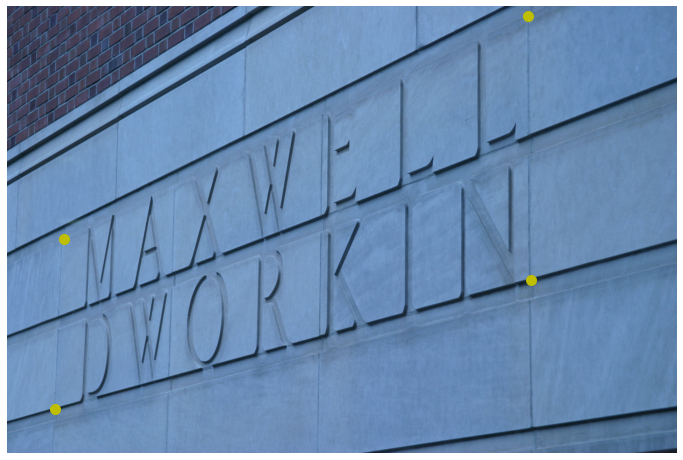

In [48]:
# Enter the corner coordinates in this numpy array, one (x,y) per row. Note the 
# order you use (we suggest clockwise order from document top-left).
src_corners = np.array([[129,534],
                        [1194,22],
                        [1200,627],
                        [110,922]])

# Verify your corners by plotting them (remember to disable interaction first)
%matplotlib inline  
plt.figure(figsize=(12,10))
plt.imshow(im)
plt.axis('off')
plt.plot(src_corners[:,0],src_corners[:,1],'yo', markersize=10)

In [49]:
def in2hom(X):
    return np.concatenate([X, np.ones((X.shape[0], 1), dtype=np.float32)], axis=1)

# Helper function: convert from Nx3 homogeneous to Nx2 inhomogeneous coordinates
def hom2in(X):
    return X[:, :2] / X[:, 2:]

input X1: [[ 129  534]
 [1194   22]
 [1200  627]
 [ 110  922]]
input X1: [[  0   0]
 [500   0]
 [500 200]
 [  0 200]]
X2:  [[  0   0]
 [500   0]
 [500 200]
 [  0 200]]
X2 after Normalization
X2: [-1.31306433 -0.52522573  1.        ]
X1: [-1.19003913  0.01742618  1.        ]
after hstack:
[-1.19003913  0.01742618  1.          1.        ]
X2: [ 1.31306433 -0.52522573  1.        ]
X1: [ 1.20465463 -1.13382566  1.        ]
after hstack:
[ 1.20465463 -1.13382566  1.          1.        ]
X2: [1.31306433 0.52522573 1.        ]
X1: [1.21814586 0.22654028 1.        ]
after hstack:
[1.21814586 0.22654028 1.         1.        ]
X2: [-1.31306433  0.52522573  1.        ]
X1: [-1.23276136  0.8898592   1.        ]
after hstack:
[-1.23276136  0.8898592   1.          1.        ]
A:  [[ 0.          0.          0.          1.19003913 -0.01742618 -1.
   0.62503917 -0.00915268 -0.52522573]
 [-1.19003913  0.01742618  1.          0.          0.          0.
  -1.56259793  0.02288169  1.31306433]
 [ 0.        

(-0.5, 499.5, 199.5, -0.5)

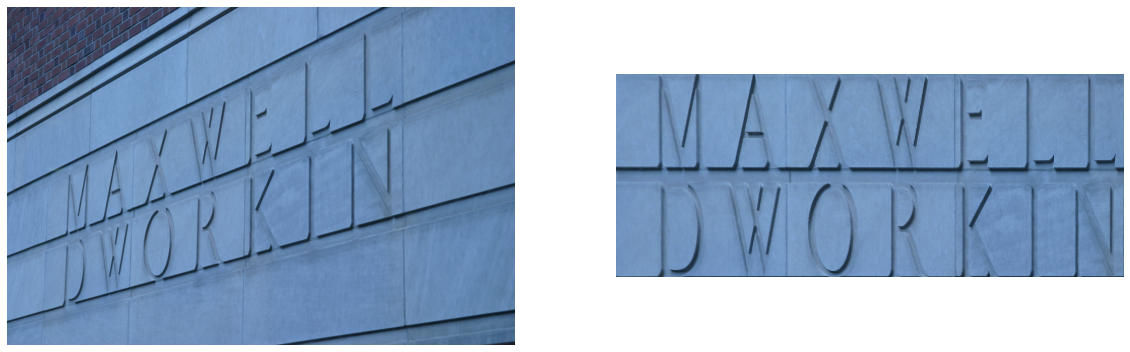

In [50]:

def applyH(src, M, dsize):
    # src   – input image
    # M     – 3x3 matrix (homography) that maps homogenous src coords to homogeneous output coords
    # dsize – size of the output image (e.g., 1100x850)

    h,w,num_channels = src.shape
    
    # Define ouput pixel grid
    x, y = np.meshgrid(np.arange(dsize[0]), np.arange(dsize[1]))
    
    # Shape Nx2 and then Nx3 (homogeneous)
    xy = np.concatenate([x.flatten()[:, np.newaxis], y.flatten()[:, np.newaxis]], axis=1)
    X2h = in2hom(xy)
    
    # Apply H^{-1} to X2h. Note that it is also possible to use lstsq to avoid inverting
    # matrices which can introduce numerical instabilities.
    #X1h, _, _, _ = np.linalg.lstsq(M, X2h.transpose(), rcond=None)
    X1h = np.linalg.inv(M) @ X2h.transpose()
    X1 = hom2in(X1h.transpose())
        
    # Initialize output image
    out = np.zeros((dsize[1], dsize[0], num_channels), dtype=src.dtype)

    # Interpolate each channel independently
    # Fill missing values with np.nan values, which is useful for the extension task.
    for c in range(num_channels):
        interpolator = scipy.interpolate.RegularGridInterpolator((np.arange(h), np.arange(w)),
                                                                 src[:, :, c], bounds_error=False,
                                                                 fill_value=np.nan)

        out[:, :, c] = np.reshape(interpolator(X1[:, ::-1]), (dsize[1], dsize[0]))  # Swap x and y in X1
        
    return out

# WRITE YOUR CODE HERE, REPLACING THE FOLLOWING LINE




out_corners = np.array([
    [0,0],
    [500,0],
    [500,200], # 2.5 : 1 
    [0,200]
])




H = getH(src_corners, out_corners)

print("H:", H)


imout= applyH(im, H, (500,200))

print("imout size:", imout.shape)

# display input and output (rectified) image 
%matplotlib inline
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(im)
plt.axis('off')
plt.subplot(122)
plt.imshow(imout)
plt.axis('off')
